<a href="https://colab.research.google.com/github/gurung-ajay/Emotion-Detection-on-text-data-with-ML/blob/main/Emotion_detection_with_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Emotion Detection on text data

Using: Pandas, Matplotlib, NLTK and Scikit Learn(for classical Machine Learning) and Tensorflow(for Deep Learning)

Dataset link: https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp?datasetId=605165&sortBy=voteCount

This dataset has two columns.
* First column consists of text sentences
* Second column contains the emotion the sentence is evoking.

By training on this data I am building a model that can predict emotions any given input text.

For comparison, I have tried building models using two methods:
* Deep Learning
* Classical Machine Learning

Based on this, the project is divided into two sections for modeling.

# Importing Libraries

In [ ]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, accuracy_score

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df_train = pd.read_csv('/content/train.txt')
df_test = pd.read_csv('/content/test.txt')
df_val = pd.read_csv('/content/val.txt')

In [ ]:
df_train = df_train.iloc[:, 0].str.split(';', expand = True)
df_test = df_test.iloc[:, 0].str.split(';', expand = True)
df_val = df_val.iloc[:, 0].str.split(';', expand = True)

In [ ]:
df_train.columns = ['Text', 'Emotion']
df_test.columns = ['Text', 'Emotion']
df_val.columns = ['Text', 'Emotion']

In [ ]:
df_train.sample(2)

,Text,Emotion
11423,i felt such guilt for being sad for having ang...,joy
14454,i feel distracted when people think i m overre...,anger


In [ ]:
df_test.sample(2)

,Text,Emotion
1130,i feel terrible when i hurt peoples feelings w...,sadness
112,i am feeling better though i dont sound it,joy


In [ ]:
df_val.sample(2)

,Text,Emotion
1915,i stand between the two but did not hold off t...,sadness
1298,i was literally swishing around in the water f...,sadness


# Analyzing Data

## Checking null values

In [ ]:
df_train.isnull().sum()

Text       0
Emotion    0
dtype: int64

In [ ]:
df_test.isnull().sum()

Text       0
Emotion    0
dtype: int64

In [ ]:
df_val.isnull().sum()

Text       0
Emotion    0
dtype: int64

## Analyzing texts

In [ ]:
df_train.describe()

,Text,Emotion
count,15999,15999
unique,15968,6
top,i cant escape the tears of sadness and just tr...,joy
freq,2,5362


In [ ]:
voc = 0
txt = []
for i in df_train['Text']:
  words = nltk.word_tokenize(i)
  for j in words:
    if j not in txt:
      txt.append(j)

len(txt)

15210

Total unique words are 15210

In [ ]:
length = []
for i in df_train['Text']:
  words = nltk.word_tokenize(i)
  l = len(words)
  length.append(l)

average = sum(length)/len(length)

In [ ]:
average

19.176261016313518

In [ ]:
max(length)

66

Average length of sentence is 19.18 and longest sentence's length is 66

## Unique values (emotions)

In [ ]:
df_train['Emotion'].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [ ]:
df_test['Emotion'].unique()

array(['sadness', 'joy', 'fear', 'anger', 'love', 'surprise'],
      dtype=object)

In [ ]:
df_val['Emotion'].unique()

array(['sadness', 'love', 'anger', 'joy', 'fear', 'surprise'],
      dtype=object)

# Mapping variable to be predicted with numbers ranging from 0 length of unique data

In [ ]:
emotions = df_train['Emotion'].unique()
mapper = dict(zip(emotions, range(len(emotions))))
mapper

{'sadness': 0, 'anger': 1, 'love': 2, 'surprise': 3, 'fear': 4, 'joy': 5}

In [ ]:
y_train = df_train['Emotion']
y_test = df_test['Emotion']
y_val = df_val['Emotion']

In [ ]:
y_train = y_train.map(mapper).astype(float)
y_test = y_test.map(mapper).astype(float)
y_val = y_val.map(mapper).astype(float)

# Classical Machine Learning models

## Preprocessing data

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
def clean_data(x):
  x = x.lower()
  words = nltk.word_tokenize(x)
  stop_words = list(nltk.corpus.stopwords.words('english'))
  clean_words = [item for item in words if item not in stop_words]
  lemmatized_words = [lemmatizer.lemmatize(w) for w in clean_words]
  return ' '.join(lemmatized_words)

In [ ]:
df_train_cleaned = df_train
df_test_cleaned = df_test
df_val_cleaned = df_val

In [ ]:
df_train_cleaned['Text'] = df_train_cleaned['Text'].apply(clean_data)
df_test_cleaned['Text'] = df_test_cleaned['Text'].apply(clean_data)
df_val_cleaned['Text'] = df_val_cleaned['Text'].apply(clean_data)

In [ ]:
ml_X_train = df_train_cleaned['Text']
ml_X_test = df_test_cleaned['Text']
ml_X_val = df_val_cleaned['Text']

## Text vectorization

Here I will vectorize data in 'Text' column

In [ ]:
tfidf = TfidfVectorizer()

In [ ]:
tfidf.fit(ml_X_train)
ml_X_train_vectorized = tfidf.transform(ml_X_train)
ml_X_test_vectorized = tfidf.transform(ml_X_test)
ml_X_val_vectorized = tfidf.transform(ml_X_val)

##Modeling and Evaluation

In [ ]:
# models to build with pipeline
ml_models = [LogisticRegression(max_iter=5000),
             KNeighborsClassifier(n_neighbors = 5),
             SVC(),
             DecisionTreeClassifier(),
             RandomForestClassifier(),
             MultinomialNB()]

In [ ]:
# for evaluation on validation data
val_f1 = []
val_accuracy = []

# for evaluation on testing data
test_f1 = []
test_accuracy = []

for m in ml_models:
  m.fit(ml_X_train_vectorized, y_train)

  # evaluation on validation data
  ml_y_pred_val = m.predict(ml_X_val_vectorized)
  f1_sc = f1_score(y_true = y_val, y_pred = ml_y_pred_val, average = 'macro')
  val_f1.append(round(f1_sc, 2))
  accuracy_sc = accuracy_score(y_true = y_val, y_pred = ml_y_pred_val)
  val_accuracy.append(round(accuracy_sc, 2))

  # evaluation on testing data
  ml_y_pred_test = m.predict(ml_X_test_vectorized)
  f1_sc = f1_score(y_true = y_test, y_pred = ml_y_pred_test, average = 'macro')
  test_f1.append(round(f1_sc, 2))
  accuracy_sc = accuracy_score(y_true = y_test, y_pred = ml_y_pred_test)
  test_accuracy.append(round(accuracy_sc, 2))

### Evaluation on test data

In [ ]:
model_names = ['LogisticRegression', 'KNN', 'SVM', 'DevisionTree', 'RandomForest', 'MultinomialNB']

#### F1 score

In [ ]:
dict(zip(model_names, test_f1))

{'LogisticRegression': 0.81,
 'KNN': 0.72,
 'SVM': 0.81,
 'DevisionTree': 0.81,
 'RandomForest': 0.83,
 'MultinomialNB': 0.44}

<BarContainer object of 6 artists>

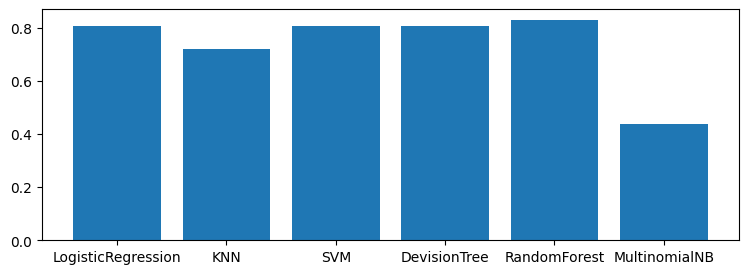

In [ ]:
plt.figure(figsize = (9,3))
plt.bar(model_names, test_f1)

#### Accuracy

In [ ]:
dict(zip(model_names, test_accuracy))

{'LogisticRegression': 0.87,
 'KNN': 0.78,
 'SVM': 0.87,
 'DevisionTree': 0.86,
 'RandomForest': 0.89,
 'MultinomialNB': 0.7}

<BarContainer object of 6 artists>

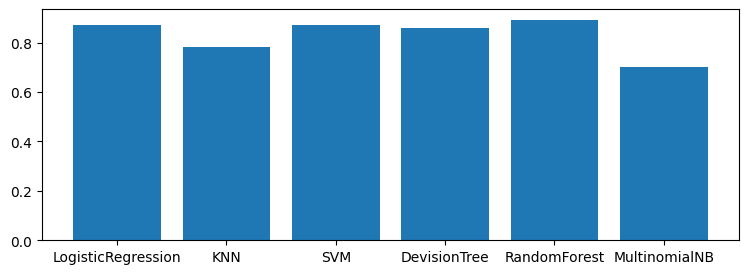

In [ ]:
plt.figure(figsize = (9,3))
plt.bar(model_names, test_accuracy)

These models seem to perform well on test data. Out of them, the Random Forest Classifier has highest accuracy of 89% and f1 score(macro) of 0.83.

### Evaluation on validation data

#### F1 Score

In [ ]:
dict(zip(model_names, val_f1))

{'LogisticRegression': 0.83,
 'KNN': 0.75,
 'SVM': 0.83,
 'DevisionTree': 0.85,
 'RandomForest': 0.87,
 'MultinomialNB': 0.43}

<BarContainer object of 6 artists>

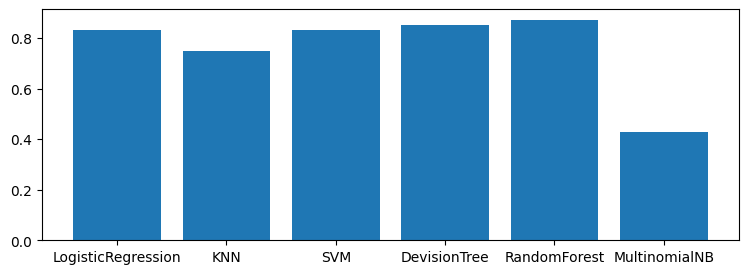

In [ ]:
plt.figure(figsize = (9,3))
plt.bar(model_names, val_f1)

#### Accuracy

In [ ]:
dict(zip(model_names, val_accuracy))

{'LogisticRegression': 0.87,
 'KNN': 0.8,
 'SVM': 0.87,
 'DevisionTree': 0.88,
 'RandomForest': 0.89,
 'MultinomialNB': 0.68}

<BarContainer object of 6 artists>

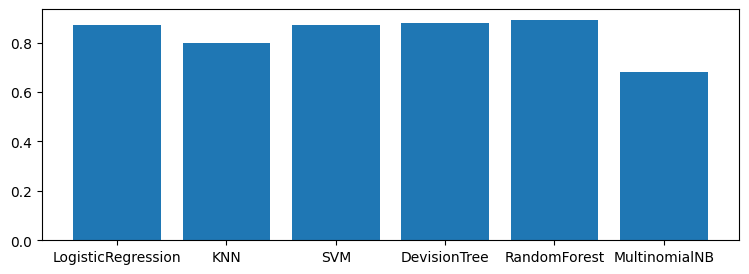

In [ ]:
plt.figure(figsize = (9,3))
plt.bar(model_names, val_accuracy)

Also on validation data these models seems to be performing very well. This means that these models can generalize well on new data. Out of these models Random Forest has highest f1 score(macro) of 0.87 and accuracy of 89%.

# Deep Neural Network models

## Text vectorization

In [ ]:
X_train = df_train['Text']
X_test = df_test['Text']
X_val = df_val['Text']

In [ ]:
vocab_size = 10000
output_sequence_length = 100
vectorizer = tf.keras.layers.TextVectorization(max_tokens = vocab_size,
                                 output_sequence_length = output_sequence_length)

In [ ]:
vectorizer.adapt(X_train)
X_train_vectorized = vectorizer(X_train)
X_test_vectorized = vectorizer(X_test)
X_val_vectorized = vectorizer(X_val)

## Simple RNN model

In [ ]:
rnn_model = tf.keras.models.Sequential()
rnn_model.add(tf.keras.layers.Embedding(vocab_size, 32, input_length = output_sequence_length))
rnn_model.add(tf.keras.layers.SimpleRNN(16))
rnn_model.add(tf.keras.layers.Dense(128, activation = 'relu'))
rnn_model.add(tf.keras.layers.Dense(6, activation = 'softmax'))
rnn_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [ ]:
history1 = rnn_model.fit(X_train_vectorized, y_train,
                        validation_data = (X_val_vectorized, y_val),
                        epochs = 10)

Epoch 1/10
500/500 [==============================] - 21s 39ms/step - loss: 1.5840 - accuracy: 0.3279 - val_loss: 1.5865 - val_accuracy: 0.3522
Epoch 2/10
500/500 [==============================] - 17s 35ms/step - loss: 1.5786 - accuracy: 0.3255 - val_loss: 1.5858 - val_accuracy: 0.3522
Epoch 3/10
500/500 [==============================] - 18s 35ms/step - loss: 1.5776 - accuracy: 0.3326 - val_loss: 1.5847 - val_accuracy: 0.3522
Epoch 4/10
500/500 [==============================] - 21s 42ms/step - loss: 1.5771 - accuracy: 0.3300 - val_loss: 1.5823 - val_accuracy: 0.3522
Epoch 5/10
500/500 [==============================] - 17s 34ms/step - loss: 1.5754 - accuracy: 0.3370 - val_loss: 1.5823 - val_accuracy: 0.3367
Epoch 6/10
500/500 [==============================] - 18s 36ms/step - loss: 1.5626 - accuracy: 0.3666 - val_loss: 1.5901 - val_accuracy: 0.3502
Epoch 7/10
500/500 [==============================] - 19s 37ms/step - loss: 1.5261 - accuracy: 0.4011 - val_loss: 1.6297 - val_accuracy:

Using Simple RNN, the model is underfit and unable to learn from the data

## LSTM model

In [ ]:
lstm_model = tf.keras.models.Sequential()
lstm_model.add(tf.keras.layers.Embedding(vocab_size, 32, input_length = output_sequence_length))
lstm_model.add(tf.keras.layers.LSTM(16))
lstm_model.add(tf.keras.layers.Dense(128, activation = 'relu'))
lstm_model.add(tf.keras.layers.Dense(6, activation = 'softmax'))
lstm_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [ ]:
history2 = lstm_model.fit(X_train_vectorized, y_train,
                        validation_data = (X_val_vectorized, y_val),
                        epochs = 10)

Epoch 1/10
500/500 [==============================] - 34s 60ms/step - loss: 1.5865 - accuracy: 0.3321 - val_loss: 1.5882 - val_accuracy: 0.2746
Epoch 2/10
500/500 [==============================] - 30s 61ms/step - loss: 1.5773 - accuracy: 0.3335 - val_loss: 1.5808 - val_accuracy: 0.3522
Epoch 3/10
500/500 [==============================] - 31s 62ms/step - loss: 1.5774 - accuracy: 0.3341 - val_loss: 1.5846 - val_accuracy: 0.3522
Epoch 4/10
500/500 [==============================] - 32s 64ms/step - loss: 1.5770 - accuracy: 0.3345 - val_loss: 1.5846 - val_accuracy: 0.3522
Epoch 5/10
500/500 [==============================] - 29s 58ms/step - loss: 1.5765 - accuracy: 0.3331 - val_loss: 1.5854 - val_accuracy: 0.3522
Epoch 6/10
500/500 [==============================] - 30s 60ms/step - loss: 1.5765 - accuracy: 0.3342 - val_loss: 1.5843 - val_accuracy: 0.3522
Epoch 7/10
500/500 [==============================] - 30s 60ms/step - loss: 1.5770 - accuracy: 0.3335 - val_loss: 1.5822 - val_accuracy:

LSTM model is underfit too and is unable to learn any underlying pattern from the data.

## Bidirectional LSTM model

In [ ]:
bi_lstm_model = tf.keras.models.Sequential()
bi_lstm_model.add(tf.keras.layers.Embedding(vocab_size, 32, input_length = output_sequence_length))
bi_lstm_model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)))
bi_lstm_model.add(tf.keras.layers.Dense(128, activation = 'relu'))
bi_lstm_model.add(tf.keras.layers.Dropout(0.5))
bi_lstm_model.add(tf.keras.layers.Dense(6, activation = 'softmax'))
bi_lstm_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [ ]:
history3 = bi_lstm_model.fit(X_train_vectorized, y_train,
                        validation_data = (X_val_vectorized, y_val),
                        epochs = 10)

Epoch 1/10
500/500 [==============================] - 58s 102ms/step - loss: 1.3549 - accuracy: 0.4461 - val_loss: 0.8466 - val_accuracy: 0.6888
Epoch 2/10
500/500 [==============================] - 47s 94ms/step - loss: 0.6152 - accuracy: 0.7633 - val_loss: 0.5915 - val_accuracy: 0.8039
Epoch 3/10
500/500 [==============================] - 52s 104ms/step - loss: 0.3408 - accuracy: 0.8805 - val_loss: 0.4638 - val_accuracy: 0.8484
Epoch 4/10
500/500 [==============================] - 46s 93ms/step - loss: 0.2172 - accuracy: 0.9281 - val_loss: 0.5061 - val_accuracy: 0.8549
Epoch 5/10
500/500 [==============================] - 47s 94ms/step - loss: 0.1584 - accuracy: 0.9497 - val_loss: 0.5125 - val_accuracy: 0.8729
Epoch 6/10
500/500 [==============================] - 49s 97ms/step - loss: 0.1223 - accuracy: 0.9605 - val_loss: 0.5557 - val_accuracy: 0.8694
Epoch 7/10
500/500 [==============================] - 48s 96ms/step - loss: 0.0998 - accuracy: 0.9683 - val_loss: 0.5685 - val_accurac

It seems Bidirectional LSTM model is able to learn from the training set very well, but wasn't able to generalize well on validation data as acccurately. However, it still got accuracy of 87.94% on unseen data which means the performance of model is good.

[]

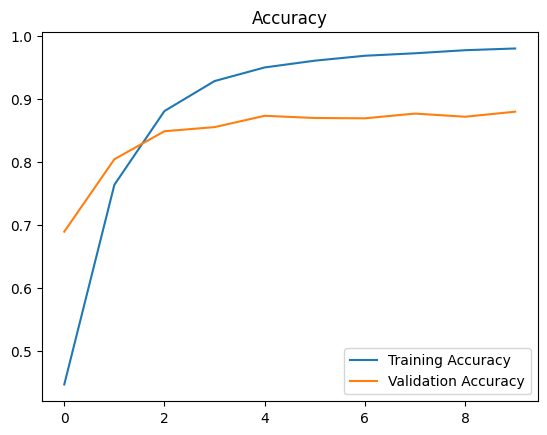

In [ ]:
plt.title('Accuracy')
plt.plot(history3.history['accuracy'], label = 'Training Accuracy')
plt.plot(history3.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.plot()

[]

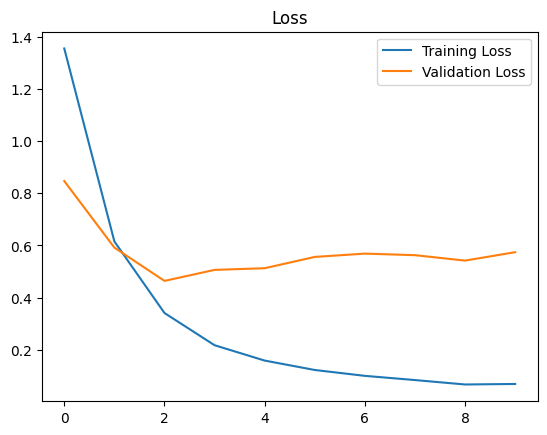

In [ ]:
plt.title('Loss')
plt.plot(history3.history['loss'], label = 'Training Loss')
plt.plot(history3.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.plot()

# Conclusion

In this project, I trained various Deep Learning and Classical Machine Learning models on emotion database. Both approaches were able to create models with good amount of accuracy.
From classical ML models, the Random Forest model performed best and on Deep Learning Models the Bidirectinal LSTM model performed the best.